<a href="https://colab.research.google.com/github/AishlyManglani/Deep-Learning_-CMPE258/blob/main/neural%20networks/tensorflow_built_in.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#tensorflow built in
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Generate synthetic data
def generate_data(n=1000):
    x1 = np.random.uniform(-1, 1, n)
    x2 = np.random.uniform(-1, 1, n)
    x3 = np.random.uniform(-1, 1, n)
    y = np.sin(x1) + np.cos(x2) + x3**2  # Nonlinear function
    return np.vstack((x1, x2, x3)).T, y.reshape(-1, 1)

# Convert data to TensorFlow tensors
X_np, y_np = generate_data()
X = tf.convert_to_tensor(X_np, dtype=tf.float32)
y = tf.convert_to_tensor(y_np, dtype=tf.float32)

# Define the model using built-in layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')

# Train the model
history = model.fit(X, y, epochs=1000, verbose=0)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


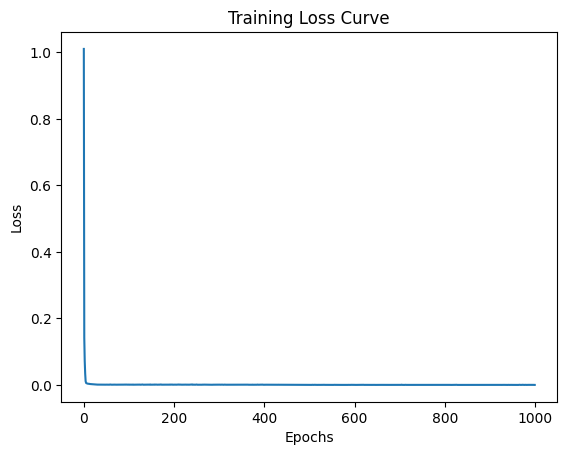

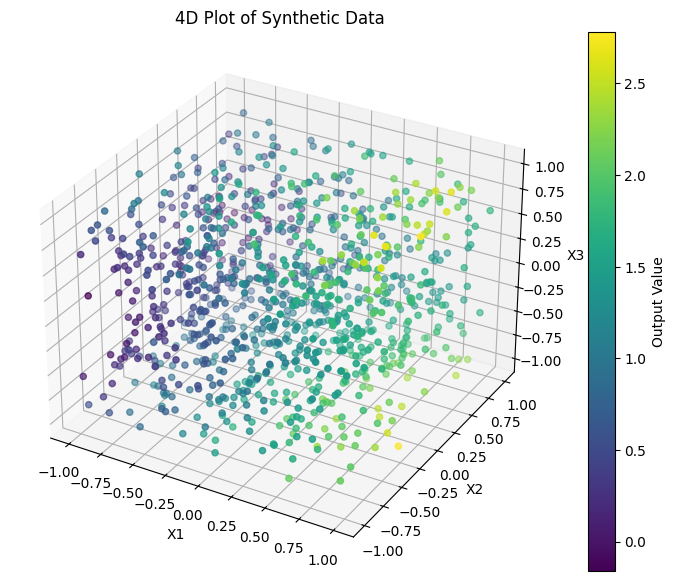

In [3]:
# Plot loss curve
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

# 4D Plot
def plot_4d(X, y):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0].numpy(), X[:, 1].numpy(), X[:, 2].numpy(), c=y.numpy(), cmap='viridis')
    fig.colorbar(scatter, label='Output Value')
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("X3")
    plt.title("4D Plot of Synthetic Data")
    plt.show()

plot_4d(X, y)